<a href="https://colab.research.google.com/github/cchio74/forgemaster/blob/master/Lab12_BJ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import tensorflow as tf
import numpy as np

In [36]:
x_data=np.array([1,2,3,4,5,6,7,8,9,10],np.float32).reshape(5,2)
y_data=np.array([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15],np.float32).reshape(5,3)

In [37]:
input_dim=x_data.shape[1]
units=y_data.shape[1]

In [38]:
x_data

array([[ 1.,  2.],
       [ 3.,  4.],
       [ 5.,  6.],
       [ 7.,  8.],
       [ 9., 10.]], dtype=float32)

# Linear regression

In [39]:
learning_rate=1e-2

In [40]:
w_init=tf.random_normal_initializer()
b_init=tf.zeros_initializer()

In [41]:
b_init((2,1))

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[0.],
       [0.]], dtype=float32)>

In [42]:
w=tf.Variable(w_init(shape=(input_dim,units)),dtype='float32')

In [43]:
b=tf.Variable(b_init(shape=(1,units)),dtype='float32')

In [44]:
for i in range(100):
  # loss
  with tf.GradientTape() as tape:
    hypothesis=tf.matmul(x_data,w)+b
    loss=tf.reduce_mean(tf.square(hypothesis-y_data))

  # gradient
  w_grad,b_grad=tape.gradient(loss,[w,b])

  # updata
  w.assign_sub(learning_rate*w_grad)
  b.assign_sub(learning_rate*b_grad)

  # display
  if i % 10==0:
    print('iteration {} loss {}'.format(i,loss))

iteration 0 loss 89.41810607910156
iteration 10 loss 0.16551537811756134
iteration 20 loss 0.1587904393672943
iteration 30 loss 0.1523764282464981
iteration 40 loss 0.1462215781211853
iteration 50 loss 0.14031526446342468
iteration 60 loss 0.1346474587917328
iteration 70 loss 0.1292087286710739
iteration 80 loss 0.12398961931467056
iteration 90 loss 0.1189812570810318


In [45]:
w.numpy()

array([[0.7105545 , 0.6690059 , 0.717709  ],
       [0.62667793, 0.7789722 , 0.85253537]], dtype=float32)

In [46]:
b.numpy()

array([[-0.08065856,  0.05534504,  0.1960417 ]], dtype=float32)

In [47]:
w

<tf.Variable 'Variable:0' shape=(2, 3) dtype=float32, numpy=
array([[0.7105545 , 0.6690059 , 0.717709  ],
       [0.62667793, 0.7789722 , 0.85253537]], dtype=float32)>

In [48]:
tf.matmul(x_data,w)+b

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[ 1.8832518,  2.2822952,  2.6188216],
       [ 4.557717 ,  5.1782517,  5.7593102],
       [ 7.2321815,  8.074207 ,  8.899799 ],
       [ 9.906646 , 10.970163 , 12.040288 ],
       [12.581111 , 13.866119 , 15.180777 ]], dtype=float32)>

In [49]:
y_data

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.],
       [ 7.,  8.,  9.],
       [10., 11., 12.],
       [13., 14., 15.]], dtype=float32)

# subclassing

In [50]:
tf.keras.layers.Layer().add_weight()

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=0.102267385>

In [51]:
# model
class Model(tf.keras.layers.Layer):
  def __init__(self,input_dim,units):
    super(Model,self).__init__()

    self.w=self.add_weight(shape=(input_dim,units),initializer='random_normal')
    self.b=self.add_weight(shape=(units,),initializer='zeros')

  def call(self,inputs):
    return tf.matmul(inputs,self.w)+self.b

In [52]:
# loss
loss=tf.keras.losses.MeanSquaredError()

In [53]:
# gradient
def grad(model,inputs,targets):
  with tf.GradientTape() as tape:
    loss_value=loss(targets,model(inputs))
  return tape.gradient(loss_value,[model.w, model.b])

In [54]:
# define
model=Model(input_dim,units)
optimizer=tf.keras.optimizers.SGD(learning_rate)

In [55]:
# learning
for i in range(100):
  # gradient
  grads=grad(model,x_data,y_data)

  # updata
  optimizer.apply_gradients(zip(grads,[model.w,model.b]))

  # display

if 1%10==0:
  print('{}{}'.format(i.loss(y_data,model(x_data))))

In [56]:
model.w.numpy()

array([[0.7319744 , 0.6268404 , 0.67540216],
       [0.60816234, 0.8163124 , 0.8915536 ]], dtype=float32)

In [57]:
model.b.numpy()

array([-0.08080701,  0.04901396,  0.17815758], dtype=float32)

In [58]:
model(x_data)

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[ 1.8674922,  2.308479 ,  2.636667 ],
       [ 4.5477653,  5.194785 ,  5.7705784],
       [ 7.228039 ,  8.08109  ,  8.9044895],
       [ 9.908313 , 10.967396 , 12.038402 ],
       [12.588587 , 13.853702 , 15.172314 ]], dtype=float32)>

In [59]:
y_data

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.],
       [ 7.,  8.,  9.],
       [10., 11., 12.],
       [13., 14., 15.]], dtype=float32)

# Sequential model

In [60]:
# model
model=tf.keras.Sequential()
model.add(tf.keras.Input(shape=(input_dim,)))
model.add(tf.keras.layers.Dense(units,kernel_initializer='random_normal'))

In [61]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 3)                 9         
Total params: 9
Trainable params: 9
Non-trainable params: 0
_________________________________________________________________


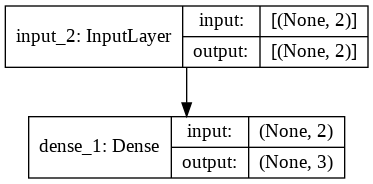

In [62]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [63]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate),loss=tf.keras.losses.MeanSquaredError())

In [64]:
# learning
model.fit(x_data,y_data,epochs=100,verbose=0)

In [65]:
model.evaluate(x_data,y_data,verbose=1)

1/1 [==============================] - 0s 63ms/step - loss: 0.1238


0.12379646301269531

In [66]:
model.get_weights()

[array([[0.6502487 , 0.67252094, 0.717426  ],
        [0.6786314 , 0.7772134 , 0.8546956 ]], dtype=float32),
 array([-0.07893634,  0.04581692,  0.18181795], dtype=float32)]

In [67]:
y_data

array([[ 1.,  2.,  3.],
       [ 4.,  5.,  6.],
       [ 7.,  8.,  9.],
       [10., 11., 12.],
       [13., 14., 15.]], dtype=float32)

In [68]:
model.predict(x_data)

array([[ 1.9285753,  2.2727647,  2.6086352],
       [ 4.586335 ,  5.172233 ,  5.752878 ],
       [ 7.244096 ,  8.071702 ,  8.897121 ],
       [ 9.901856 , 10.971171 , 12.041365 ],
       [12.559615 , 13.87064  , 15.185608 ]], dtype=float32)